# KG Generator Tool

## Let's get started by importing relevant libraries

In [ ]:
#pip install -r requirements.txt

In [1]:
from utils import *
#from kg_gen_4_onlyProts import *

from kg_gen_3 import *

from IPython.display import Markdown, display

C:\Users\reagon.karki\Anaconda3\envs\bycovid_new\lib\site-packages\pybel\struct\operations.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Please execute following cells

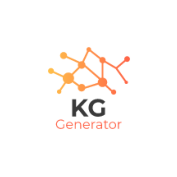

<span style='color:blue'>**Welcome to the KG Generator tool. In the following steps, we will need some inputs from your side.**</span>

Please enter the disease you are interested in and we will try to find the best matches for you.

Input: depression


index,id,name
0,EFO_0003761,unipolar depression
1,MONDO_0002050,depressive disorder
2,EFO_0007453,postpartum depression
3,EFO_0009854,treatment resistant depression
4,EFO_0009842,respiratory depression
5,MONDO_0004985,bipolar disorder
6,MONDO_0008201,Perry syndrome
7,EFO_1002014,melancholia
8,MONDO_0010026,SHORT syndrome
9,EFO_0004257,neurotic disorder


<span style='color:None'>**Here you go! Hopefully your disease of interest is in the list. If so, let's get started.**</span>

Please enter the index value of your disease of interest. Input: 0


Please enter the clinical trial phase of chemicals which should be identified by the workflow. Use a number between 1 (early phase) and 4 (FDA approved). For example, if you use 3, the KG will fetch chemicals that are in phase 3. Also, remember that lower the input value, higher will be the number of identified chemicals and therefore the running time of workflow also increases.


Your desired clinical trial phase: 1


Please provide a name for you KG. Input: depression_dec7


We have identified 2074 proteins (Swiss-Prot) associated with the disease. Please note that the proteins identified may not be unique if you combined two or more diseases. Following is a histogram that shows distribution of proteins based on scores provided by OpenTargets. The scores are influenced by various factors such as genetic associations, expression, mutations, known pathways, targeting drugs and so on.

A total of 2069 unique proteins h

Protein,ENSG,UniProt,Source,Score,disease_id
DRD2,ENSG00000149295,P14416,uniprot_swissprot,0.710311,EFO_0003761
GRIN2A,ENSG00000183454,Q12879,uniprot_swissprot,0.653392,EFO_0003761
SLC6A4,ENSG00000108576,P31645,uniprot_swissprot,0.631193,EFO_0003761
SLC6A3,ENSG00000142319,Q01959,uniprot_swissprot,0.617103,EFO_0003761
SLC6A2,ENSG00000103546,P23975,uniprot_swissprot,0.614781,EFO_0003761
HTR2A,ENSG00000102468,P28223,uniprot_swissprot,0.613892,EFO_0003761
GABRA1,ENSG00000022355,P14867,uniprot_swissprot,0.609749,EFO_0003761
HTR2C,ENSG00000147246,P28335,uniprot_swissprot,0.608697,EFO_0003761
GABRG3,ENSG00000182256,Q99928,uniprot_swissprot,0.608363,EFO_0003761
GABRA2,ENSG00000151834,P47869,uniprot_swissprot,0.608178,EFO_0003761


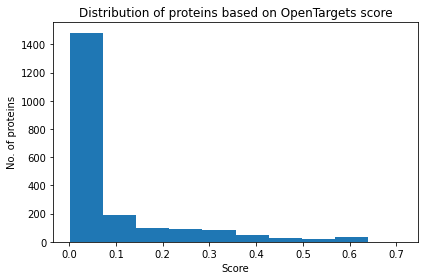



We recommend taking a threshold above 0.3 to exclude loosely associated proteins. 
Please enter your desired threshold: 0.0


Alright, we are good to go now. Your KG is now being generated! Sit back and relax!!

 Total no. of proteins:  2074

      Protein             ENSG UniProt             Source     Score  \
0       DRD2  ENSG00000149295  P14416  uniprot_swissprot  0.710311   
1     GRIN2A  ENSG00000183454  Q12879  uniprot_swissprot  0.653392   
2     SLC6A4  ENSG00000108576  P31645  uniprot_swissprot  0.631193   
3     SLC6A3  ENSG00000142319  Q01959  uniprot_swissprot  0.617103   
4     SLC6A2  ENSG00000103546  P23975  uniprot_swissprot  0.614781   
...      ...              ...     ...                ...       ...   
2069   ALDOC  ENSG00000109107  P09972  uniprot_swissprot  0.001478   
2070    WFS1  ENSG00000109501  O76024  uniprot_swissprot  0.001478   
2071  LRATD1  ENSG00000162981  Q96KN4  uniprot_swissprot  0.001478   
2072  NAP1L4  ENSG00000205531  Q99733  uniprot_swisspr

Fetching Protein-related info:   0%|          | 0/2069 [00:00<?, ?it/s]

A total of 109 drugs have been identified. Now fetching relevant data


Retrieving mechanisms from ChEMBL:   0%|          | 0/109 [00:00<?, ?it/s]

Retrieving bioassays from ChEMBL:   0%|          | 0/109 [00:00<?, ?it/s]

Filtering UniProt proteins from ChEMBL:   0%|          | 0/106 [00:00<?, ?it/s]

Filtering human proteins from ChEMBL:   0%|          | 0/106 [00:00<?, ?it/s]

Populating ChEMBL data for human proteins:   0%|          | 0/106 [00:00<?, ?it/s]

Populating Uniprot edges:   0%|          | 0/2069 [00:00<?, ?it/s]

Populating Chemical-MoA edges:   0%|          | 0/71 [00:00<?, ?it/s]

Adding bioassay edges to BEL:   0%|          | 0/60 [00:00<?, ?it/s]

Retrieving Adverse Effects for each drug:   0%|          | 0/109 [00:00<?, ?it/s]

A total of 1735 SNPs have been identified from DisGeNET. Now adding relevant data




Adding disease associated SNPs:   0%|          | 0/1352 [00:00<?, ?it/s]

Your KG is now generated! 

Now let's save all the files that were created in the process. 

Please enter the location (e.g. 'C:\Users\rkarki\Documents\kg\' ) where KG files should be stored. A folder will be created automatically. 

Input: C:\Users\reagon.karki\Documents\GitHub\kgg\data\kgs\ndd\


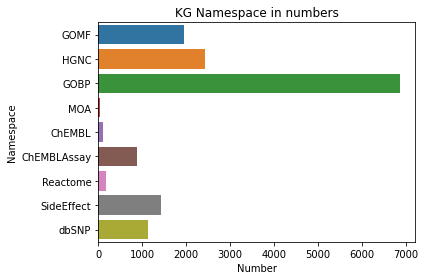

In [2]:
kg = createKG()

In [ ]:
#kg.to_csv('data/kgs/test/cvd.csv')

In [3]:
kg.summarize

Name,depression_dec7
Version,0.0.1
Nodes,15047
Namespaces,9
Edges,89531
Annotations,0
Citations,4
Authors,0
Components,273
Warnings,0
Network Density,0.000395


In [ ]:
to_jupyter(kg)

In [ ]:
KG_namespace_plot(kg)

In [ ]:
test = pd.read_csv('data/kgs/test/t2dm.csv')
test.head(5)
test = list(set(list(test['UniProt'])))
len(test)

In [ ]:
def ExtractFromUniProt(uniprot_id) -> dict:
    """Uniprot parser to retrieve information about OMIM disease, reactome pathway, biological process,
     and molecular functions.

    :param uniprot_id:
    :return:
    """
    Uniprot_Dict = []

    mapped_uprot = []

    for id in tqdm(uniprot_id, desc='Fetching Protein-related info'):
        
        print(id)

        # Retrieve data for id in text format if found in uniprot
        ret_uprot = requests.get(
            'https://www.uniprot.org/uniprot/' + id + '.txt'
        ).text.split('\n')
        
        #return(ret_uprot)

        if ret_uprot == ['']:
            continue

        id_copy = id
        mapped_uprot.append(id_copy)
        i = 0
        j = 0
        k = 0
        id = {}
        id['Disease'] = {}
        id['Reactome'] = {}
        id['Function'] = {}
        id['BioProcess'] = {}
        id['Gene'] = {}

        # parse each line looking for info about disease, pathway, funcn, bp and so on
        for line in ret_uprot:
            # parse lines with disease and extract disease names and omim ids
            if '-!- DISEASE:' in line:
                if ('[MIM:' in line):
                    dis = line.split(':')
                    id['Disease'].update({dis[1][1:-5]: dis[2][:-1]})

            # extract reactome ids and names
            if 'Reactome;' in line:
                ract = line.split(';')
                id['Reactome'].update({ract[2][1:-2]: ract[1][1:]})

            # look for functions
            if ' F:' in line:
                if j < 5:
                    fn = line.split(';')
                    id['Function'].update({fn[2][3:]: fn[1][1:]})
                    j += 1

            # look for biological processes
            if ' P:' in line and 'GO;' in line:
                if i < 5:
                    bp = line.split(';')
                    # bp returns list with GO ids and names
                    id['BioProcess'].update({bp[2][3:]: bp[1][1:]})
                    i += 1

            if 'GN   Name' in line:
                if k == 0:
                    gene = line.split('=')
                    gene = gene[1].split(' ')
                    if ';' in gene[0]:
                        gene = gene[0].split(';')
                        gene = {'Gene': gene[0]}
                    else:
                        gene = {'Gene': gene[0]}
                    id.update(gene)
                    k += 1

        Uniprot_Dict.append(id)

    Uniprot_Dict = dict(zip(mapped_uprot, Uniprot_Dict))

    return Uniprot_Dict

In [ ]:
xx = ExtractFromUniProt(test[4790:4800])

In [ ]:
xx

# Additional stuff

In [ ]:
infile= open('data/kgs/ndd/ad/ad.pkl','rb')
graph= pickle.load(infile)
infile.close()

In [ ]:
graph.summarize

In [ ]:
prot = pd.read_csv('data/kgs/ndd/ad/diseaseAssociatedProteins.csv')
prot = list(prot['Protein'])
prot = prot[1:6]

chem = pd.read_csv('data/kgs/ndd/ad/diseaseAssociatedDrugs.csv')
chem = list(chem['drugId'])
chem = chem[1:6]

prot_chem = prot + chem

In [ ]:
prot_chem

In [ ]:
query_graph = filter_graph(graph,prot_chem)

In [ ]:
to_jupyter(query_graph)

In [ ]:
prtn_attr = nx.get_node_attributes(graph,'UniProt')
bionote_attr = nx.get_node_attributes(graph,'3Dbio')

for node in graph.nodes():
    unique_node = []
    
    if node.name in prot:
        if node not in unique_node:
            
            unique_node.append(node)
            print(node.name)
       
            if isinstance(node,pybel.dsl.Abundance):
                print(chem_attr[node])
                
            if isinstance(node,pybel.dsl.Protein):
                print(prtn_attr[node])
                
            if isinstance(node,pybel.dsl.Protein):
                print(bionote_attr[node])

In [ ]:
17*40000000*20000000

In [ ]:
13600000000000000/105004

In [ ]:
129518875471/20509

In [ ]:
def GetDiseaseAssociatedDrugs(disease_id,CT_phase):

    efo_id = disease_id
    size = getDrugCount(efo_id)

    query_string = """
        query associatedTargets($my_efo_id: String!, $my_size: Int){
          disease(efoId: $my_efo_id){
            id
            name
            knownDrugs(size:$my_size){
                uniqueTargets
                uniqueDrugs
                count
                rows{
                    approvedSymbol
                    approvedName
                    prefName
                    drugType
                    drugId
                    phase
                    ctIds
                }

            }
          }
        }

    """

    #replace $efo_id with value from efo_id
    #query_string = query_string.replace("$efo_id",f'"{efo_id}"')
    #query_string = query_string.replace("$efo_id",f'"{efo_id}"')

    # Set variables object of arguments to be passed to endpoint
    variables = {"my_efo_id": efo_id, "my_size": size}

    # Set base URL of GraphQL API endpoint
    base_url = "https://api.platform.opentargets.org/api/v4/graphql"

    # Perform POST request and check status code of response
    r = requests.post(base_url, json={"query": query_string, "variables": variables})
    #r = requests.post(base_url, json={"query": query_string})
    #print(r.status_code)

    # Transform API response from JSON into Python dictionary and print in console
    api_response = json.loads(r.text)
    return(api_response)
    
    if api_response['data']['disease']['knownDrugs']['uniqueTargets'] == 0:
        
        print('No drugs found in clinical trials for ' + str(api_response['data']['disease']['name']))
        
    else:
    
        df = pd.DataFrame(api_response['data']['disease']['knownDrugs']['rows'])
        df = df.loc[df['phase'] >= int(CT_phase),:]

        if not df.empty:
            df['id'] = efo_id
            df['disease'] = api_response['data']['disease']['name']
            #print('Your dataframe is ready')
            return(df)
    
#     else:
#         print('No drugs found in clinical trials')
    

In [ ]:
tt = GetDiseaseAssociatedDrugs('MONDO_0008903',1)

In [ ]:
tt